### LIBRARIES

In [1]:
import pandas as pd
import zstandard as zstd
import io
import matplotlib.pyplot as plt
import seaborn as sns

### FILE PATHS

In [2]:
CALENDAR_DATA_V1_PATH = "../data/raw/v1/calendar.csv.zst"
LISTINGS_DATA_V1_PATH = '../data/raw/v1/listings.csv.zst'
REVIEWS_DATA_V1_PATH = '../data/raw/v1/reviews.csv.zst'
SESSIONS_DATA_V1_PATH = '../data/raw/v1/sessions.csv.zst'
USERS_DATA_V1_PATH = '../data/raw/v1/users.csv.zst'



#### LOAD DATA FROM csv.zst

In [3]:
# creating a dataframe for .csv.zst files
def create_dataframe_from_csv_zst(filepath: str) -> pd.DataFrame:

    with open(filepath, 'rb') as compressed:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(compressed) as reader:
            decompressed = io.TextIOWrapper(reader, encoding='utf-8')
            df = pd.read_csv(decompressed, low_memory=False)
    return df


In [4]:
calendar_dataframe = create_dataframe_from_csv_zst(CALENDAR_DATA_V1_PATH)
listings_dataframe = create_dataframe_from_csv_zst(LISTINGS_DATA_V1_PATH)
reviews_dataframe = create_dataframe_from_csv_zst(REVIEWS_DATA_V1_PATH)
sessions_dataframe = create_dataframe_from_csv_zst(SESSIONS_DATA_V1_PATH)
users_dataframe = create_dataframe_from_csv_zst(USERS_DATA_V1_PATH)

In [48]:
# checking missing values in the dataframes
def check_dataframe_missing_values(df: pd.DataFrame) -> None:
    total_values = len(df)

    df_columns = df.columns

    for col in df_columns:
        missing_values = df[col].isnull().sum()
        missing_percentage = (missing_values / total_values) * 100
        print(f"Column: {col}, Missing Values: {missing_values}, Missing Percentage: {missing_percentage:.2f}%")


def missing_values_visualization(df: pd.DataFrame, title: str, figsize: tuple = (12,6)) -> None:
    plt.figure(figsize=(12, 6))

    counts = []
    for col in df.columns:
        counts.append({'column': col, 'status': 'Existing', 'count': df[col].notnull().sum()})
        counts.append({'column': col, 'status': 'Missing', 'count': df[col].isna().sum()})
    counts_df = pd.DataFrame(counts)

    plt.figure(figsize=figsize)
    sns.barplot(data=counts_df, x='column', y='count', hue='status', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=90)

    plt.show()


### CALENDAR DF

In [6]:
calendar_dataframe.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3.014252e+07,2025-02-04,t,$80.00,NaN,2.0,1125.0
1,4.976663e+07,2025-01-23,t,$125.00,NaN,1.0,1125.0
2,4.930056e+07,2025-07-30,NaN,$100.00,NaN,NaN,NaN
3,7.431842e+17,2025-03-06,t,NaN,NaN,1.0,1125.0
4,NaN,NaN,t,NaN,NaN,5.0,30.0


#### Missing values

Column: listing_id, Missing Values: 320571, Missing Percentage: 19.99%
Column: date, Missing Values: 320764, Missing Percentage: 20.01%
Column: available, Missing Values: 320643, Missing Percentage: 20.00%
Column: price, Missing Values: 320420, Missing Percentage: 19.99%
Column: adjusted_price, Missing Values: 1603286, Missing Percentage: 100.00%
Column: minimum_nights, Missing Values: 320421, Missing Percentage: 19.99%
Column: maximum_nights, Missing Values: 321261, Missing Percentage: 20.04%


<Figure size 1200x600 with 0 Axes>

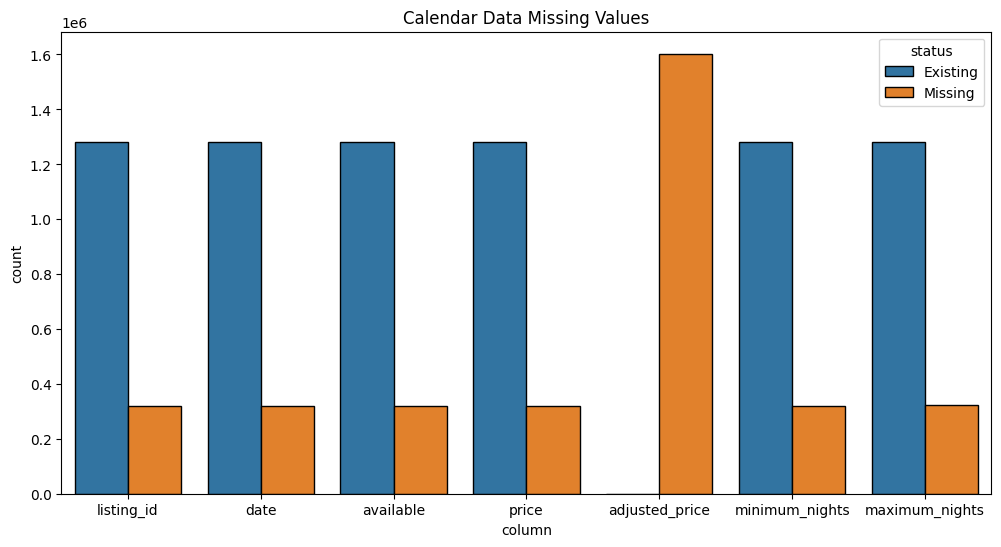

In [47]:
check_dataframe_missing_values(calendar_dataframe)
missing_values_visualization(calendar_dataframe, "Calendar Data Missing Values")

### LISTINGS DF

In [8]:
listings_dataframe.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.041947e+07,https://www.nocarz.pl/rooms/30419466,2.024123e+13,2024-12-25,NaN,Athenian Niche in Plaka | Athenian Homes,NaN,NaN,https://a0.muscache.com/pictures/f6649b43-fcf6...,135482103.0,...,4.97,NaN,4.91,00000287535,t,12.0,12.0,0.0,0.0,2.51
1,4.998268e+07,https://www.nocarz.pl/rooms/49982681,2.024123e+13,2024-12-26,city scrape,Athenian Apartments - Syntagma sq. #1,Experience the vibrant heartbeat of Athens fro...,There are plenty of sights to see in Athens in...,NaN,NaN,...,NaN,4.91,NaN,00002033718,t,70.0,70.0,0.0,0.0,NaN
2,4.880072e+07,https://www.nocarz.pl/rooms/48800718,2.024123e+13,2024-12-25,city scrape,"Modern Penthouse with Parking, Terrace & BBQ",You will be staying at a unique rooftop Duplex...,Koukaki is a residential area of Athens but at...,https://a0.muscache.com/pictures/miso/Hosting-...,113548208.0,...,4.79,4.71,4.74,00003035440,t,90.0,NaN,0.0,0.0,3.08
3,1.101264e+18,https://www.nocarz.pl/rooms/1101264403993187936,2.024123e+13,2024-12-25,NaN,NaN,At Ma Maison Downtown Villa you will discover ...,Gazi is ideal for discovering Athens because o...,https://a0.muscache.com/pictures/hosting/Hosti...,118181401.0,...,5.00,4.66,4.86,00002489817,t,8.0,8.0,NaN,0.0,3.56
4,NaN,NaN,2.024123e+13,2024-12-25,city scrape,Stylish Contemporary Penthouse - Hip Athens Ce...,"Located in Kolonaki, Central Athens’ upmarket ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4899687.0,...,4.99,4.91,4.81,NaN,t,1.0,1.0,0.0,0.0,3.76


Column: id, Missing Values: 909, Missing Percentage: 20.70%
Column: listing_url, Missing Values: 881, Missing Percentage: 20.06%
Column: scrape_id, Missing Values: 891, Missing Percentage: 20.29%
Column: last_scraped, Missing Values: 864, Missing Percentage: 19.67%
Column: source, Missing Values: 852, Missing Percentage: 19.40%
Column: name, Missing Values: 888, Missing Percentage: 20.22%
Column: description, Missing Values: 899, Missing Percentage: 20.47%
Column: neighborhood_overview, Missing Values: 2540, Missing Percentage: 57.83%
Column: picture_url, Missing Values: 883, Missing Percentage: 20.10%
Column: host_id, Missing Values: 892, Missing Percentage: 20.31%
Column: host_url, Missing Values: 872, Missing Percentage: 19.85%
Column: host_name, Missing Values: 854, Missing Percentage: 19.44%
Column: host_since, Missing Values: 921, Missing Percentage: 20.97%
Column: host_location, Missing Values: 1945, Missing Percentage: 44.29%
Column: host_about, Missing Values: 2584, Missing Pe

<Figure size 1200x600 with 0 Axes>

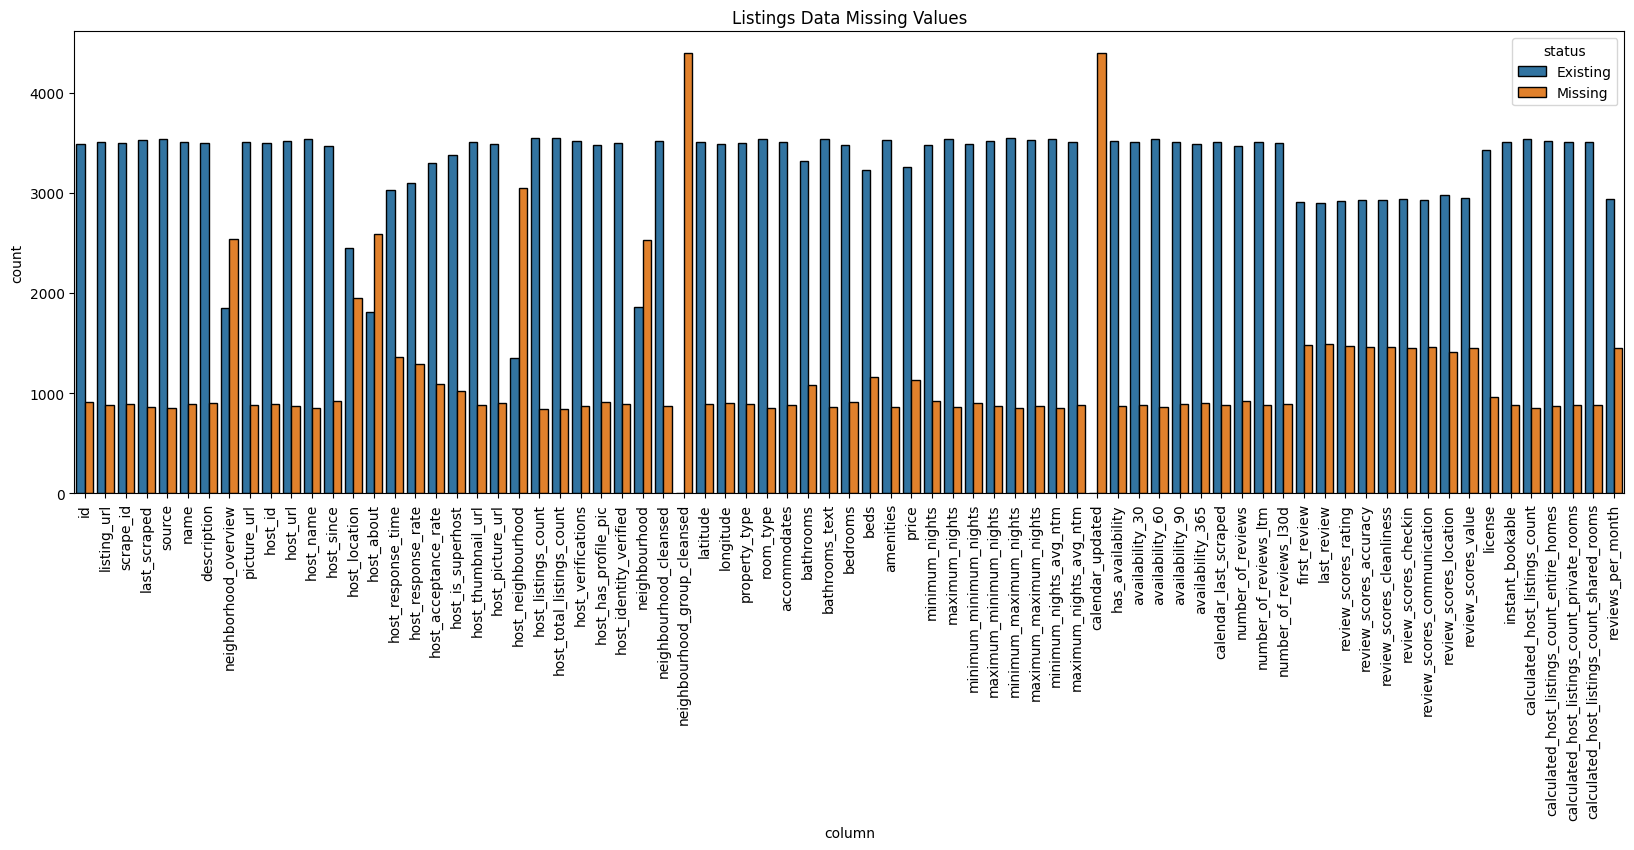

In [49]:
check_dataframe_missing_values(listings_dataframe)
missing_values_visualization(listings_dataframe, "Listings Data Missing Values", figsize=(20, 6))

### REVIEWS DF

In [10]:
reviews_dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15029864.0,1.208519e+18,2024-07-25,NaN,Daniel,"ניקוס מאוד עזר, וזמן תגובה ממש מהיר. המיקום נה..."
1,23124958.0,8.396945e+17,2023-03-04,501218607.0,Ivancillo,Everything was perfect and the location was fa...
2,22865582.0,6.338012e+17,NaN,282184671.0,Isak,Nice
3,51336810.0,6.279988e+17,2022-05-16,NaN,Kenna,We had such a great time staying here! The loc...
4,NaN,1.038245e+18,NaN,NaN,Charly,"Très bon logement. <br/>Bien situé, propre. <..."


Column: listing_id, Missing Values: 46517, Missing Percentage: 19.96%
Column: id, Missing Values: 46902, Missing Percentage: 20.12%
Column: date, Missing Values: 46494, Missing Percentage: 19.95%
Column: reviewer_id, Missing Values: 46497, Missing Percentage: 19.95%
Column: reviewer_name, Missing Values: 46743, Missing Percentage: 20.06%
Column: comments, Missing Values: 46397, Missing Percentage: 19.91%


<Figure size 1200x600 with 0 Axes>

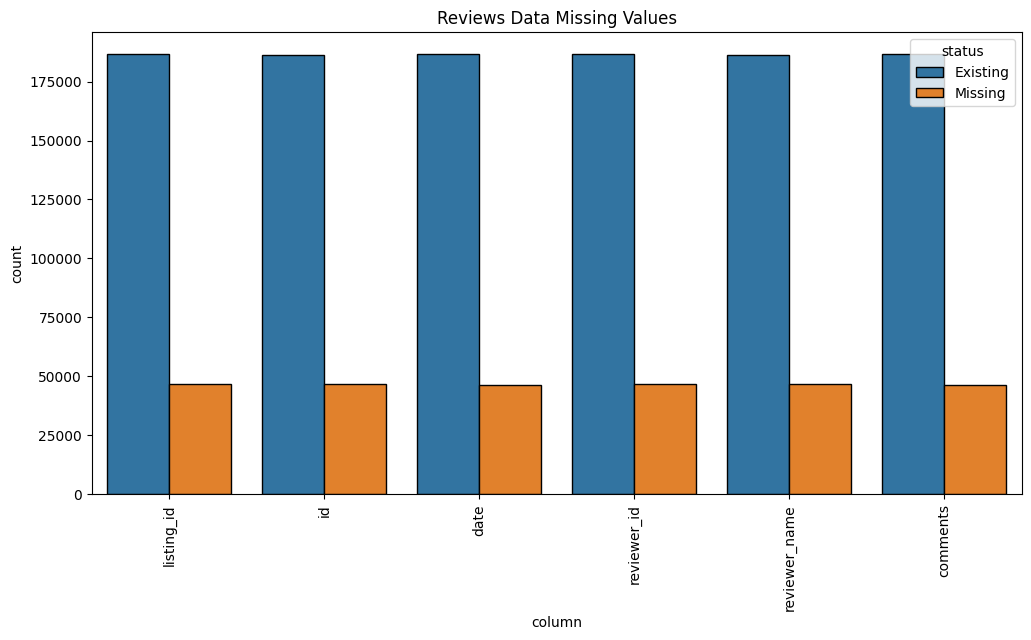

In [51]:
check_dataframe_missing_values(reviews_dataframe)
missing_values_visualization(reviews_dataframe, "Reviews Data Missing Values")

### SESSIONS DF

In [12]:
sessions_dataframe.head(5)

,action,user_id,timestamp,listing_id
0,browse_listings,NaN,2024-06-30T14:44:43.340297,NaN
1,view_listing,24106857.0,2024-06-30T15:08:59.340297,5.169696e+07
2,view_listing,NaN,2024-06-30T15:13:38.340297,9.023092e+17
3,view_listing,24106857.0,NaN,1.126008e+18
4,NaN,24106857.0,NaN,NaN


Column: action, Missing Values: 629445, Missing Percentage: 20.00%
Column: user_id, Missing Values: 628980, Missing Percentage: 19.99%
Column: timestamp, Missing Values: 629690, Missing Percentage: 20.01%
Column: listing_id, Missing Values: 815573, Missing Percentage: 25.92%


<Figure size 1200x600 with 0 Axes>

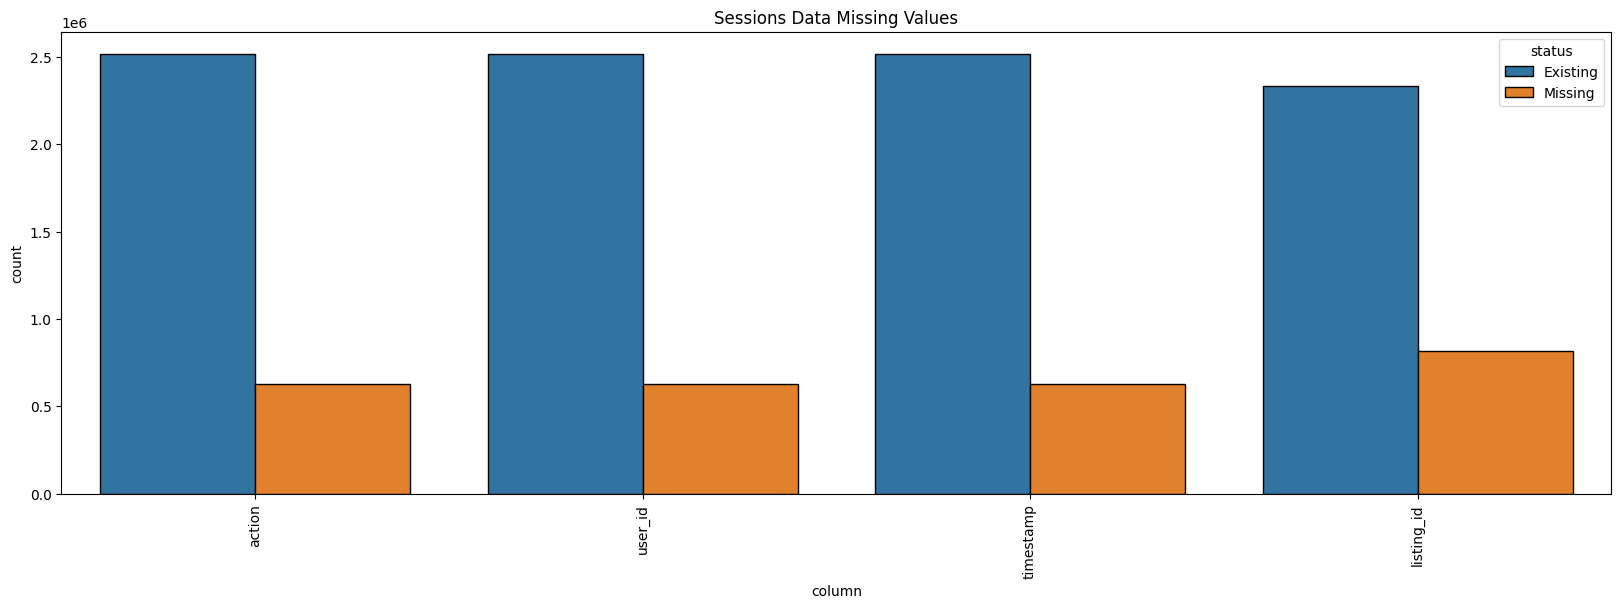

In [52]:
check_dataframe_missing_values(sessions_dataframe)
missing_values_visualization(sessions_dataframe, "Sessions Data Missing Values", figsize=(20, 6))

### USERS DF

In [14]:
users_dataframe.head(5)

,id,name,surname,city,street,street_number,postal_code
0,432845450.0,Julita,NaN,Malbork,NaN,NaN,29-597
1,45257839.0,Apolonia,Jaroch,Sosnowiec,Kwiatowa,29/56,NaN
2,484782310.0,Kalina,Dubik,Będzin,Dobra,97,NaN
3,486291306.0,NaN,Leonowicz,Luboń,Partyzantów,757,80-705
4,NaN,Marianna,Ciołczyk,Oleśnica,Kreta,NaN,89-001


Column: id, Missing Values: 43826, Missing Percentage: 19.97%
Column: name, Missing Values: 44086, Missing Percentage: 20.09%
Column: surname, Missing Values: 43815, Missing Percentage: 19.96%
Column: city, Missing Values: 43863, Missing Percentage: 19.98%
Column: street, Missing Values: 44045, Missing Percentage: 20.07%
Column: street_number, Missing Values: 43690, Missing Percentage: 19.91%
Column: postal_code, Missing Values: 43905, Missing Percentage: 20.00%


<Figure size 1200x600 with 0 Axes>

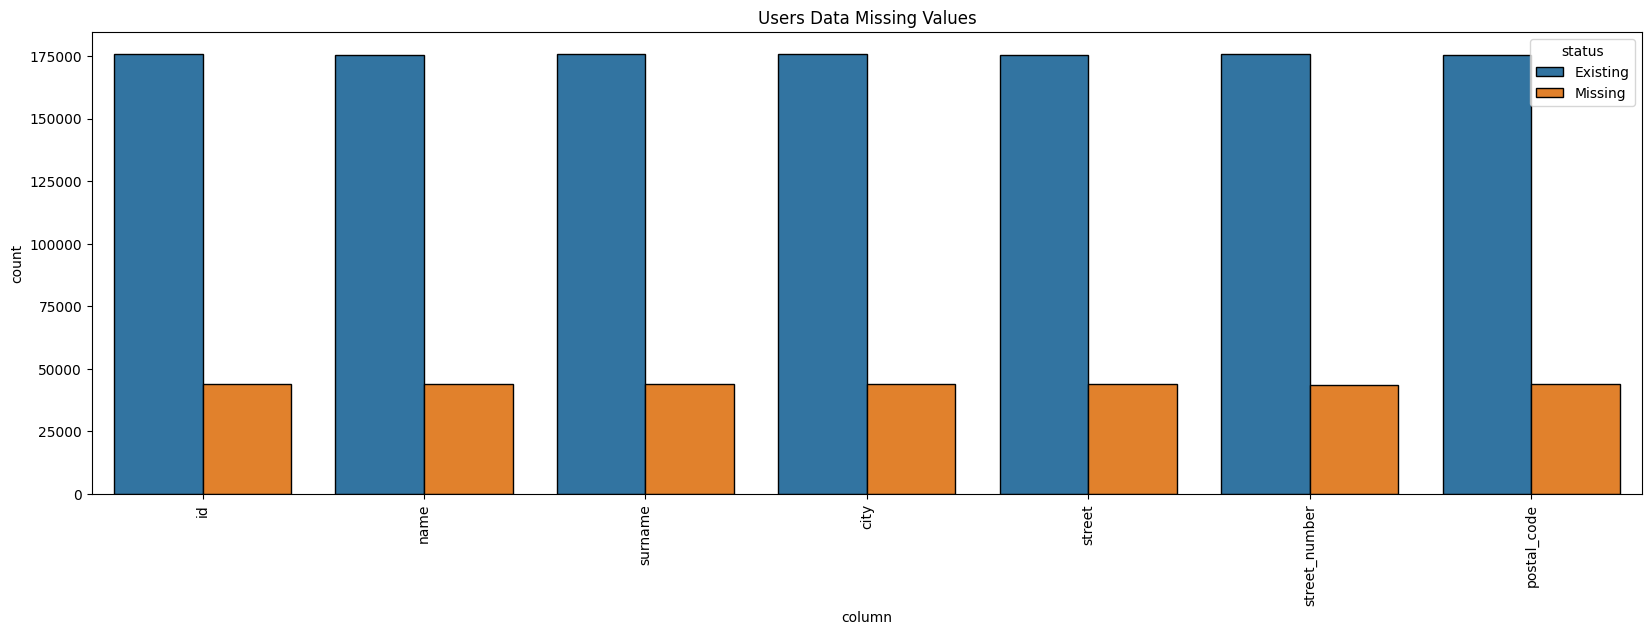

In [53]:
check_dataframe_missing_values(users_dataframe)
missing_values_visualization(users_dataframe, "Users Data Missing Values", figsize=(20, 6))

# EDA

### Price

In [19]:
# channging price to int
calendar_dataframe['price'] = calendar_dataframe['price'].str.replace('[$,]', '', regex=True).astype(float)

minimal_price = calendar_dataframe['price'].min()
maximal_price = calendar_dataframe['price'].max()
print(f'Minimal price: {minimal_price} $, Maximal price: {maximal_price} $')

Minimal price: 9.0 $, Maximal price: 20000.0 $


In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
calendar_dataframe['price'].describe()

count   1282866.000
mean        153.706
std         588.441
min           9.000
25%          50.000
50%          75.000
75%         119.000
max       20000.000
Name: price, dtype: float64

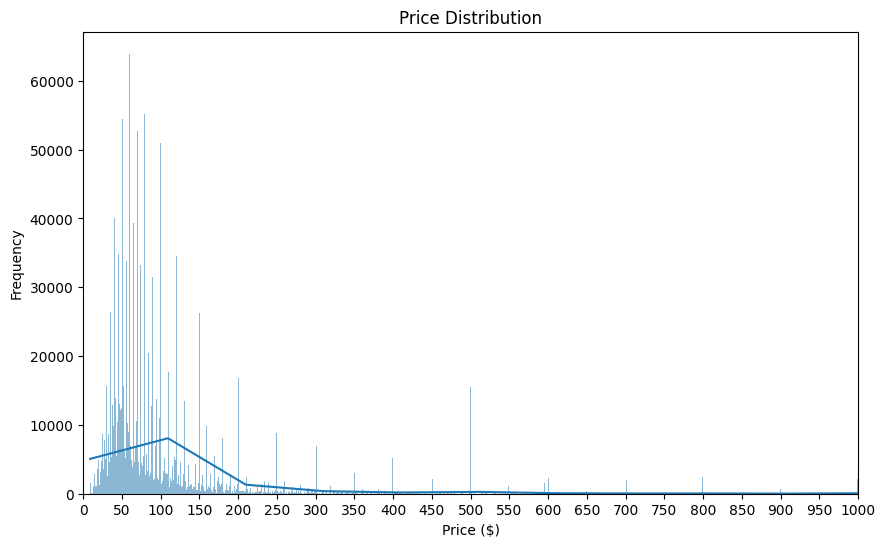

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(calendar_dataframe['price'], kde=True)
plt.title('Price Distribution')
plt.xlim(0, 1000)
plt.xticks(range(0, 1001, 50))
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Price Box')

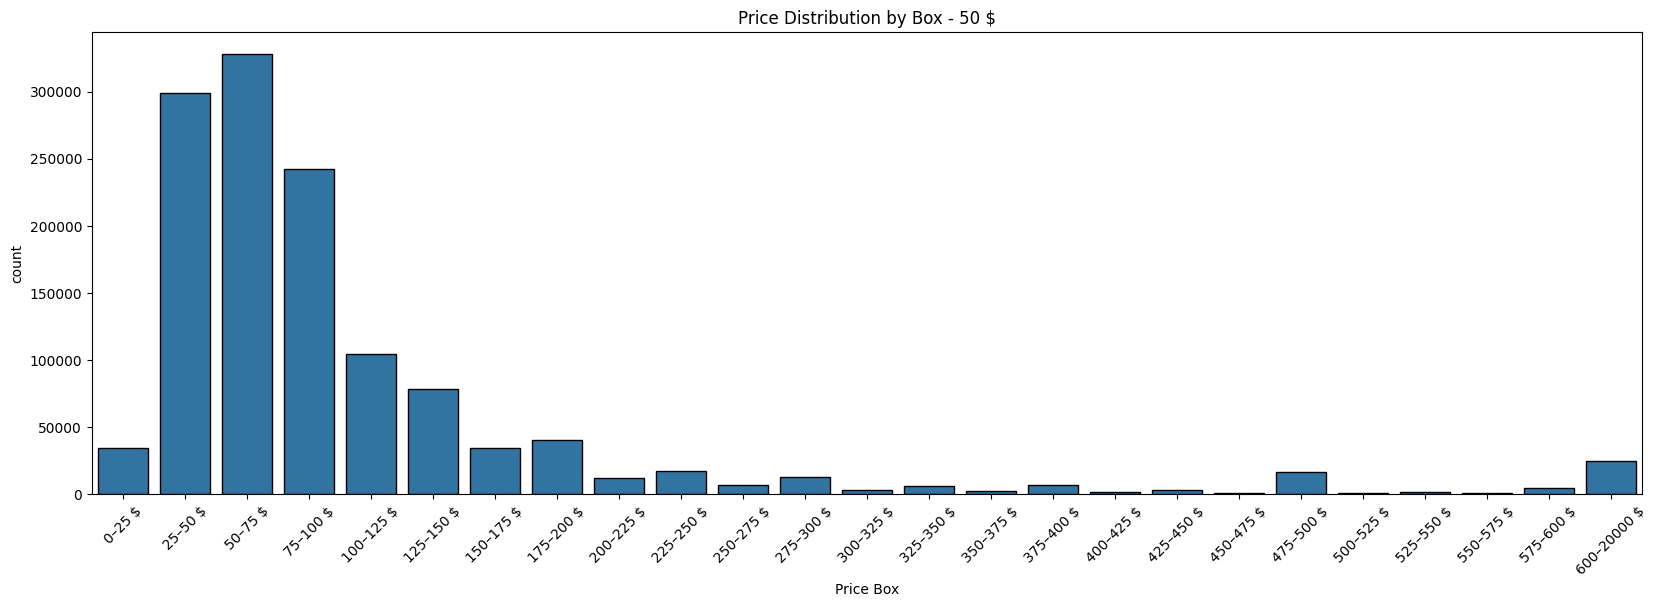

In [54]:
boxes = list(range(0, 601, 25)) + [int(maximal_price)]

labels = [f"{boxes[i]}–{boxes[i+1]} $" for i in range(len(boxes)-1)]

calendar_dataframe['price_box'] = pd.cut(
    calendar_dataframe['price'],
    bins=boxes,
    labels=labels,
    include_lowest=True
)

plt.figure(figsize=(20, 6))
sns.countplot(data=calendar_dataframe, x='price_box', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Price Distribution by Box - 50 $')
plt.xlabel('Price Box')

### Dates

In [67]:
calendar_dataframe['date']

0          2025-02-04
1          2025-01-23
2          2025-07-30
3          2025-03-06
4                 NaN
              ...    
1603281    2025-10-09
1603282    2025-01-14
1603283    2025-04-09
1603284    2025-06-04
1603285    2025-06-23
Name: date, Length: 1603286, dtype: object

In [70]:
date_series = pd.to_datetime(calendar_dataframe['date'], format='%Y-%m-%d')
calendar_dataframe['date'] = date_series
calendar_dataframe['year'] = calendar_dataframe['date'].dt.year
calendar_dataframe['month'] = calendar_dataframe['date'].dt.month
calendar_dataframe['day'] = calendar_dataframe['date'].dt.day

calendar_dataframe.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_box,year,month,day
0,3.014252e+07,2025-02-04,t,80.0,NaN,2.0,1125.0,75–100 $,2025.0,2.0,4.0
1,4.976663e+07,2025-01-23,t,125.0,NaN,1.0,1125.0,100–125 $,2025.0,1.0,23.0
2,4.930056e+07,2025-07-30,NaN,100.0,NaN,NaN,NaN,75–100 $,2025.0,7.0,30.0
3,7.431842e+17,2025-03-06,t,NaN,NaN,1.0,1125.0,NaN,2025.0,3.0,6.0
4,NaN,NaT,t,NaN,NaN,5.0,30.0,NaN,NaN,NaN,NaN
